# Multi-Armed Bandit Problem with Upper Confidence Bound (UCB) Algorithm

In this exercise, we will implement the Upper Confidence Bound (UCB) algorithm to solve a simple multi-armed bandit problem. This problem helps illustrate the exploration-exploitation tradeoff inherent in reinforcement learning.


## Problem Statement

We are faced with `N` slot machines (bandits), each with a different probability of payout (`win rate`, it is just a number between $(0,1)$). Our goal is to develop a strategy (the UCB algorithm) that maximizes our rewards over a series of plays.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_palette('colorblind')
sns.set_context("paper")

# Set the style
sns.set_style('whitegrid')

## Bandit Class

First, we define a `Bandit` class representing each slot machine. The class includes methods for simulating the pulling of the machine's arm and updating the estimated win rate.


In [2]:
class Bandit:
    def __init__(self, p):
        self.p = p  # The win rate
        self.p_estimate = 0.
        self.N = 0  # number of samples collected so far

    def pull(self):
        # Simulate pulling the bandit's arm
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1
        self.p_estimate = ((self.N - 1) * self.p_estimate + x) / self.N


## UCB Algorithm

The UCB algorithm selects which bandit to play based on a trade-off between their estimated win rates and how much we have learned about each bandit.


In [3]:
def ucb(mean, n, nj):
    return mean + np.sqrt(2 * np.log(n) / nj)

def run_experiment(bandit_probs, N, strategy="ucb", epsilon=0.1, decay_rate=0.99):
    bandits = [Bandit(p) for p in bandit_probs]
    rewards = np.zeros(N)
    total_plays = 0
    
    # Strategy selection
    if strategy == "random":
        selection_strategy = lambda: np.random.choice(len(bandits))
    elif strategy == "epsilon-greedy":
        selection_strategy = lambda: np.random.choice([np.random.choice(len(bandits)), np.argmax([b.p_estimate for b in bandits])], p=[epsilon, 1-epsilon])
    elif strategy == "epsilon-greedy-decay":
        selection_strategy = lambda: np.random.choice([np.random.choice(len(bandits)), np.argmax([b.p_estimate for b in bandits])], p=[current_epsilon, 1-current_epsilon]) if np.random.random() < current_epsilon else np.argmax([b.p_estimate for b in bandits])
    elif strategy == "ucb":
        selection_strategy = lambda: np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
    else:
        raise ValueError("Strategy not implemented!")

    # Initialization: Play each bandit once - No changes needed
    for j in range(len(bandits)):
        x = bandits[j].pull()
        bandits[j].update(x)
        total_plays += 1
        rewards[total_plays - 1] = x

    # Run the Main loop to play N rounds 
    
    if strategy == "epsilon-greedy-decay":
        current_epsilon = epsilon
    
    for i in range(N):
        if strategy == "epsilon-greedy-decay":
            # Update current_epsilon using the decay rate
            current_epsilon *= decay_rate
        
        j = selection_strategy()
        x = bandits[j].pull()
        bandits[j].update(x)
        total_plays += 1
        rewards[i] = x

        if strategy == "epsilon-greedy-decay" and i < N - 1:
            # Optionally adjust epsilon for the next round
            current_epsilon = max(current_epsilon * decay_rate, 0.01)  # Ensure epsilon does not become too small

    # Plotting the results - No changes needed
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(N) + 1)

    plt.plot(win_rates, label=strategy)

    # Displaying the estimated probabilities - No changes needed
    for b in bandits:
        print(f'Strategy {strategy}: Estimated probability of bandit, {b.p_estimate}')
    print('Total Reward:', rewards.sum())




Strategy random: Estimated probability of bandit, 0.18618618618618624
Strategy random: Estimated probability of bandit, 0.48424068767908307
Strategy random: Estimated probability of bandit, 0.7476635514018695
Total Reward: 469.0
Strategy epsilon-greedy: Estimated probability of bandit, 0.16666666666666669
Strategy epsilon-greedy: Estimated probability of bandit, 0.5
Strategy epsilon-greedy: Estimated probability of bandit, 0.7750826901874311
Total Reward: 735.0
Strategy epsilon-greedy-decay: Estimated probability of bandit, 0.0
Strategy epsilon-greedy-decay: Estimated probability of bandit, 0.4
Strategy epsilon-greedy-decay: Estimated probability of bandit, 0.757271815446339
Total Reward: 755.0
Strategy ucb: Estimated probability of bandit, 0.21212121212121218
Strategy ucb: Estimated probability of bandit, 0.4895833333333333
Strategy ucb: Estimated probability of bandit, 0.7471395881006863
Total Reward: 706.0


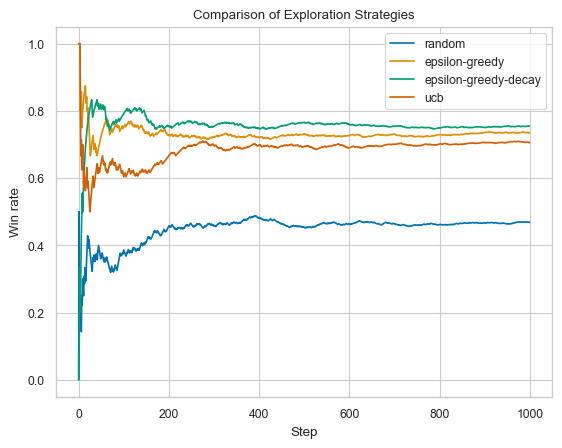

In [4]:
bandit_probs = [0.2, 0.5, 0.75]  # Bandit win rates
N = 1000  # Number of rounds

# Run experiments with different strategies
for strategy in ["random", "epsilon-greedy", "epsilon-greedy-decay", "ucb"]:
    run_experiment(bandit_probs, N, strategy=strategy)

plt.title('Comparison of Exploration Strategies')
plt.xlabel('Step')
plt.ylabel('Win rate')
plt.legend()
plt.show()


Strategy random: Estimated probability of bandit, 0.0985280865124662
Strategy random: Estimated probability of bandit, 0.6001786245906524
Strategy random: Estimated probability of bandit, 0.39426847662141795
Total Reward: 3650.0
Strategy epsilon-greedy: Estimated probability of bandit, 0.1335403726708074
Strategy epsilon-greedy: Estimated probability of bandit, 0.6039529914529933
Strategy epsilon-greedy: Estimated probability of bandit, 0.411214953271028
Total Reward: 5827.0
Strategy epsilon-greedy-decay: Estimated probability of bandit, 0.0
Strategy epsilon-greedy-decay: Estimated probability of bandit, 0.0
Strategy epsilon-greedy-decay: Estimated probability of bandit, 0.39960000000000045
Total Reward: 3995.0
Strategy ucb: Estimated probability of bandit, 0.055555555555555546
Strategy ucb: Estimated probability of bandit, 0.600144389438943
Strategy ucb: Estimated probability of bandit, 0.3715415019762846
Total Reward: 5915.0


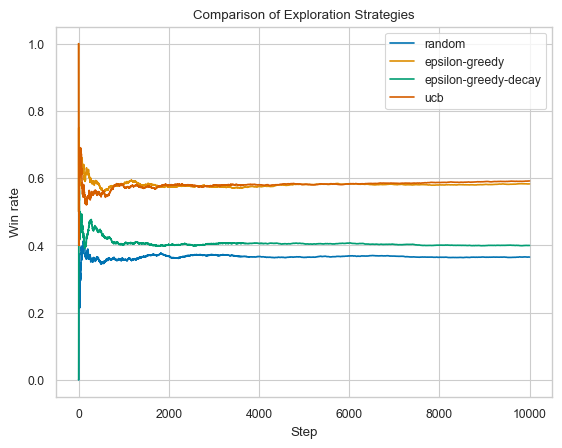

In [5]:
# Example usage
bandit_probs = [0.1, 0.6, 0.4]  # Define the probabilities of winning for each bandit
N = 10000  # Number of rounds to play

# Run experiments with different strategies
for strategy in ["random", "epsilon-greedy", "epsilon-greedy-decay", "ucb"]:
    run_experiment(bandit_probs, N, strategy=strategy)

plt.title('Comparison of Exploration Strategies')
plt.xlabel('Step')
plt.ylabel('Win rate')
plt.legend()
plt.show()

## Conclusion

This experiment demonstrates the effectiveness of the UCB algorithm in balancing exploration and exploitation to maximize rewards in a multi-armed bandit scenario.
